In [1]:
import scanpy as sc
from scipy import sparse, io
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import numpy as np

In [2]:
def process_feature_df(mtx, Barcodes, feature):
    gene_name = []
    for i in feature:
        gene_name.append(i[1])
    transcriptome_df = pd.DataFrame.sparse.from_spmatrix(data = mtx.tocsr(),
                                                         columns = barcodes, index = gene_name)
    return transcriptome_df

In [3]:
def filter_umi (df, copy=False):
    df = df.copy() if copy else df
    feature_cutoff = [[turn_point(i, df)] for i in list(df.index)]
    
    for i in range(0, len(feature_cutoff)):
        ZERO_HTO = df.iloc[i, :].loc[df.iloc[i, :] <= feature_cutoff[i][0]].index
        df.at[df.index[i], ZERO_HTO] = 0
    return df, feature_cutoff

def turn_point(sgRNA_name, df):
    sgRNA_count  = df.T.filter(items=[sgRNA_name]).sum(axis=1).sort_values(ascending=False)
    sgRNA_cumsum = sgRNA_count.cumsum()

    #get the total cell number of this sgRNA
    cell_num = np.argwhere(sgRNA_count > 0).size

    #calculate the turning point by using the max derivative
    turning_point = sgRNA_cumsum.loc[((sgRNA_cumsum.diff()) / sgRNA_count.sum() > (1/cell_num))].shape
    
    return(sgRNA_count.iloc[turning_point])

In [4]:
Count_list = []
WORK_DIR = '/project/GCRB/Hon_lab/s426305/Sequencing_data_analysis/10X/YW49-YW54_10x_mapping/nova_seq_data/10x_pipeline_transcriptome/\
MB231-YWsg1_combine_nova_HTO/outs/filtered_feature_bc_matrix/'
MTX = io.mmread(WORK_DIR + 'matrix.mtx.gz')
barcodes = np.loadtxt(WORK_DIR + 'barcodes.tsv.gz', dtype=str)
features = np.loadtxt(WORK_DIR + 'features.tsv.gz', dtype=str)
HTO_df = process_feature_df(MTX, barcodes, features).iloc[-10:,:]
HTO_df_dense = HTO_df.sparse.to_dense()
HTO_df_adj, feature_cutoff = filter_umi(HTO_df_dense, copy=True)
HTO_count = np.sum(HTO_df_adj.iloc[0:10, :] > 0, axis=0).values
Count_list.append(HTO_count)

/home2/s426305/.conda/envs/py36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


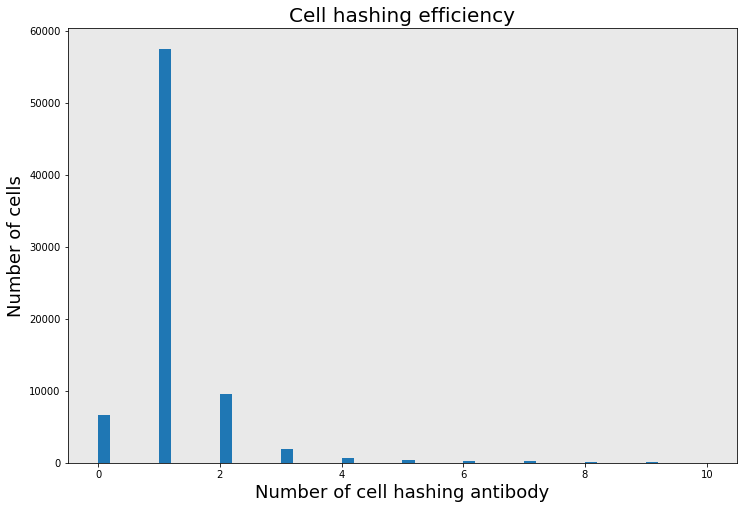

In [5]:
fig, ax = plt.subplots(figsize= (12,8))
ax.hist(Count_list, bins=50)

ax.set_facecolor('#E9E9E9')
ax.set_ylabel('Number of cells', fontsize=18)
ax.set_xlabel('Number of cell hashing antibody', fontsize=18)
ax.set_title("Cell hashing efficiency", fontsize=20)
plt.savefig('./Cell_hashing_efficiency.pdf')

In [6]:
HTO_df_adj

,AAACCCAAGCATCGAG-1,AAACCCAAGCCTCAGC-1,AAACCCAAGCGTGCCT-1,AAACCCAAGGAACGAA-1,AAACCCACACCAATTG-1,AAACCCACACGGGCTT-1,AAACCCACACGTCTCT-1,AAACCCACACTACCCT-1,AAACCCACAGAGATGC-1,AAACCCACAGGCGTTC-1,...,TTTGGTTGTTAAACCC-6,TTTGGTTTCATTGTGG-6,TTTGTTGAGCGCTGCT-6,TTTGTTGAGGTCATTC-6,TTTGTTGAGTGAGTTA-6,TTTGTTGCATTGAAGA-6,TTTGTTGGTCATTGCA-6,TTTGTTGGTCTGTGTA-6,TTTGTTGGTCTTCCGT-6,TTTGTTGTCCTCTAGC-6
BC_H1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,561,0,0,0,0
BC_H2,0,0,0,0,0,0,0,0,0,734,...,0,0,0,0,0,0,0,0,0,204
BC_H3,0,0,696,0,0,0,0,460,0,0,...,245,0,0,0,0,0,0,0,0,0
BC_H4,0,0,0,0,0,0,224,0,0,0,...,0,0,0,186,0,0,0,0,0,0
BC_H5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BC_H6,1715,475,0,0,0,0,1546,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BC_H7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BC_H8,0,0,0,0,0,0,0,0,1152,511,...,0,0,0,0,0,0,0,0,0,0
BC_H9,0,0,0,344,0,329,0,838,0,0,...,68,0,0,0,197,0,0,0,0,0
BC_H10,0,0,0,0,183,0,0,2788,0,0,...,0,0,0,0,0,0,0,0,329,0


In [7]:
HTO_df_adj_bool = HTO_df_adj > 0

In [8]:
HTO_df_adj_bool.sum(axis=0).values == 1

array([ True,  True,  True, ..., False,  True,  True])

In [10]:
#### number of singlet from HTO
len(HTO_df_adj.columns[HTO_df_adj_bool.sum(axis=0).values == 1].values)

57543

In [11]:
WORK_DIR = '/project/GCRB/Hon_lab/s426305/Sequencing_data_analysis/10X/YW49-YW54_10x_mapping/nova_seq_data/10x_pipeline_transcriptome/MB231-YWsg1_combine_nova_HTO/outs/filtered_feature_bc_matrix/'
MTX = io.mmread(WORK_DIR + 'matrix.mtx.gz')
barcodes = np.loadtxt(WORK_DIR + 'barcodes.tsv.gz', dtype=str)
features = np.loadtxt(WORK_DIR + 'features.tsv.gz', dtype=str)
trans_df = process_feature_df(MTX, barcodes, features)

In [12]:
sub_df = trans_df[HTO_df_adj.columns[HTO_df_adj_bool.sum(axis=0).values == 1].values].iloc[:-10,:]

In [13]:
sub_df.to_pickle('/project/GCRB/Hon_lab/s426305/Sequencing_data_analysis/10X/YW49-YW54_10x_mapping/Remove_HTO_sub_df_nova.pkl')

In [14]:
trans_df.shape

(58391, 77218)

In [15]:
sub_df.shape

(58381, 57543)